In [1]:
from helpers.helpers import *

In [2]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

diabetes = pd.read_csv("datasets/diabetes.csv")

In [3]:
check_df(diabetes)

------Shape------
(768, 9)
------Head------
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0  33.6                     0.627   50        1
1            1       85             66             29        0  26.6                     0.351   31        0
2            8      183             64              0        0  23.3                     0.672   32        1
3            1       89             66             23       94  28.1                     0.167   21        0
4            0      137             40             35      168  43.1                     2.288   33        1
------Tail------
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
763           10      101             76             48      180  32.9                     0.171   63        0
764            2      122             70             27        

In [4]:
diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)

In [5]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

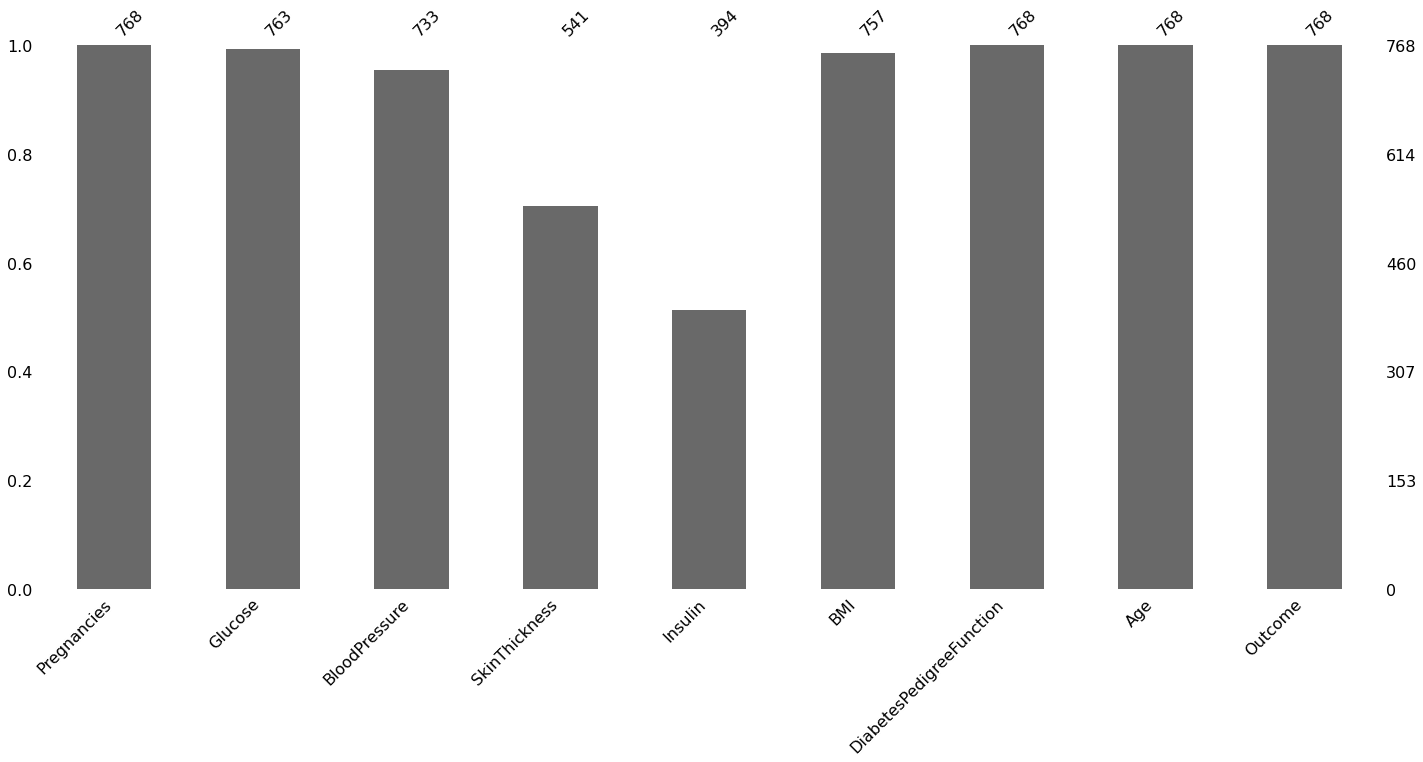

In [6]:
import missingno as msno
msno.bar(diabetes);

In [7]:
def median_target(var):   
    
    temp = diabetes[diabetes[var].notnull()]
    
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    
    return temp

In [8]:
columns = diabetes.columns

columns = columns.drop("Outcome")

In [9]:
for col in columns:
    
    diabetes.loc[(diabetes['Outcome'] == 0 ) & (diabetes[col].isnull()), col] = median_target(col)[col][0]
    diabetes.loc[(diabetes['Outcome'] == 1 ) & (diabetes[col].isnull()), col] = median_target(col)[col][1]

In [10]:
for col in columns:
    print(f"{col} : {check_outlier(diabetes,col,q1=0.05,q3=0.95)}")

Pregnancies : False
Glucose : False
BloodPressure : False
SkinThickness : True
Insulin : True
BMI : False
DiabetesPedigreeFunction : False
Age : False


In [11]:
# According to BMI, some ranges were determined and categorical variables were assigned.
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

diabetes["NewBMI"] = NewBMI

diabetes.loc[diabetes["BMI"] < 18.5, "NewBMI"] = NewBMI[0]

diabetes.loc[(diabetes["BMI"] > 18.5) & (diabetes["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
diabetes.loc[(diabetes["BMI"] > 24.9) & (diabetes["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
diabetes.loc[(diabetes["BMI"] > 29.9) & (diabetes["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
diabetes.loc[(diabetes["BMI"] > 34.9) & (diabetes["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
diabetes.loc[diabetes["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [12]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [13]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"    

In [14]:
diabetes["NewInsulinScore"] = diabetes.apply(set_insulin, axis=1)

In [15]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [16]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")

diabetes["NewGlucose"] = NewGlucose

diabetes.loc[diabetes["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]

diabetes.loc[(diabetes["Glucose"] > 70) & (diabetes["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]

diabetes.loc[(diabetes["Glucose"] > 99) & (diabetes["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]

diabetes.loc[diabetes["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [17]:
diabets = label_encoder(diabetes,"NewBMI")
diabetes = label_encoder(diabetes,"NewInsulinScore")
diabetes =label_encoder(diabetes,"NewGlucose")
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,0,3
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,4,1,1
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0,3
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,4,1,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,1,0,2
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0,2,1,2
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,4,1,2
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1,1,0,2


In [18]:
new_cols = ["NewBMI","NewGlucose","NewInsulinScore"]
cat_df = diabetes[new_cols]
y = diabetes.Outcome
X = diabetes.drop(["NewBMI","NewGlucose","NewInsulinScore","Outcome"],axis=1)
columns = X.columns
index = X.index

In [19]:
from sklearn.preprocessing import RobustScaler
transform = RobustScaler().fit(X)
X = transform.transform(X)
X = pd.DataFrame(X, columns = columns, index = index)
X = pd.concat([X, cat_df], axis = 1)

In [20]:
from sklearn.model_selection import train_test_split , cross_val_score
X_train,X_test,y_train,y_test = train_test_split(X,y)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold

In [21]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', GradientBoostingClassifier()))
models.append(("LightGBM", LGBMClassifier()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    
        kfold = KFold(n_splits = 10)
        
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        

LR: 0.841063 (0.027712)
KNN: 0.854221 (0.028717)
CART: 0.838568 (0.041179)
RF: 0.886740 (0.034330)
SVM: 0.855383 (0.029233)
XGB: 0.875103 (0.029433)
LightGBM: 0.881562 (0.028541)


In [22]:
rf_params = {"n_estimators" :[100,200,500,1000], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]}

In [23]:
rf_model = RandomForestClassifier()

In [24]:
from sklearn.model_selection import GridSearchCV
gs_cv = GridSearchCV(rf_model, 
                    rf_params,
                    cv = 10,
                    n_jobs = -1,).fit(X_train, y_train)

In [25]:
gs_cv.best_params_

{'max_depth': None,
 'max_features': 7,
 'min_samples_split': 2,
 'n_estimators': 200}

In [26]:
rf_tuned = RandomForestClassifier(**gs_cv.best_params_)

In [27]:
rf_tuned = rf_tuned.fit(X_train,y_train)

In [28]:
cross_val_score(rf_tuned, X, y, cv = 10).mean()

0.8841763499658235

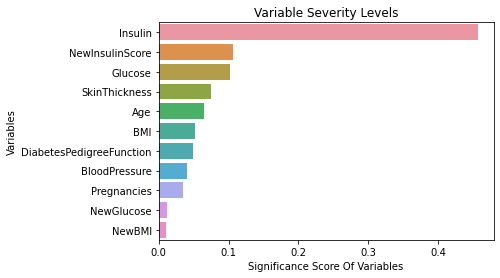

In [29]:
feature_importance(X,rf_tuned)

In [30]:
lgbm = LGBMClassifier()
lgbm_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1, 0.5],
              "n_estimators": [500, 1000, 1500],
              "max_depth":[3,5,8]}
gs_cv = GridSearchCV(lgbm,lgbm_params,cv=10,n_jobs=-1).fit(X_train,y_train)

In [31]:
gs_cv.best_params_

{'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 1500}

In [32]:
lgbm_tuned= LGBMClassifier(**gs_cv.best_params_).fit(X_train,y_train)

In [33]:
cross_val_score(lgbm_tuned, X, y, cv = 10).mean()

0.8803144224196855

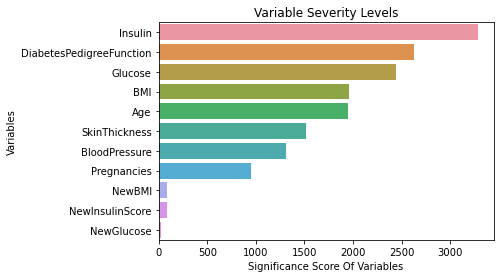

In [34]:
feature_importance(X,lgbm_tuned)